#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


#### Importing datasets

In [2]:
train = pd.read_csv('train_0OECtn8.csv')

In [3]:
test_data = pd.read_csv('test_1zqHu22.csv')

#### About datasets

In [4]:
print(f'''Number of rows : {train.shape[0]}
Number of columns : {train.shape[1]}''')

Number of rows : 89197
Number of columns : 10


In [5]:
def unique_val(data,columnName_list):
    unique_values = []
    for col in list(data.columns):
        unique_values.append(data[col].nunique())
    return unique_values

In [6]:
def null_count(data):
    return pd.DataFrame({'Features':data.columns,
                 'Data type':data.dtypes.values,
                 'NaN count':data.isnull().sum().values,
                 'NaN percentage':(data.isnull().sum().values/data.shape[0])*100,
                'Unique_count':unique_val(data,list(data.columns))})


In [7]:
null_count(train)

,Features,Data type,NaN count,NaN percentage,Unique_count
0,row_id,int64,0,0.0,89197
1,user_id,int64,0,0.0,27734
2,category_id,int64,0,0.0,47
3,video_id,int64,0,0.0,175
4,age,int64,0,0.0,58
5,gender,object,0,0.0,2
6,profession,object,0,0.0,3
7,followers,int64,0,0.0,17
8,views,int64,0,0.0,43
9,engagement_score,float64,0,0.0,229


In [8]:
null_count(test_data)

,Features,Data type,NaN count,NaN percentage,Unique_count
0,row_id,int64,0,0.0,11121
1,user_id,int64,0,0.0,10384
2,category_id,int64,0,0.0,23
3,video_id,int64,0,0.0,128
4,age,int64,0,0.0,53
5,gender,object,0,0.0,2
6,profession,object,0,0.0,3
7,followers,int64,0,0.0,15
8,views,int64,0,0.0,21


In [9]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


## Explatory Data Analysis

### Univariate analysis

In [10]:
user_count = train['user_id'].nunique()
print('Total unique users in datasets are {}'.format(user_count))

Total unique users in datasets are 27734


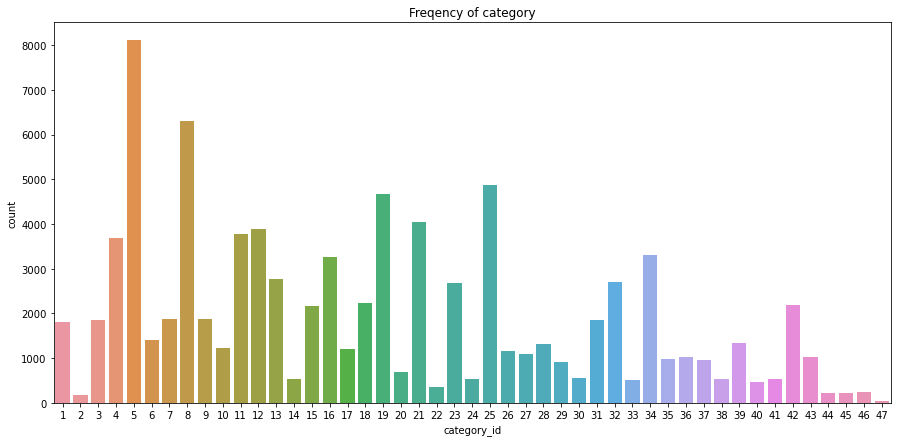

In [11]:
fig = plt.figure(figsize=(15,7))
sns.countplot(x='category_id',data = train)
plt.title('Freqency of category')
plt.show()

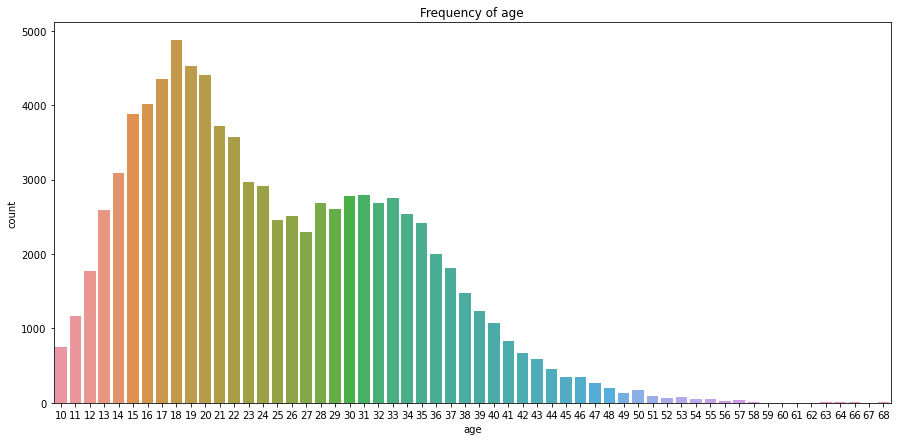

In [12]:
fig = plt.figure(figsize=(15,7))
sns.countplot(x='age',data = train)
plt.title('Frequency of age')
plt.show()

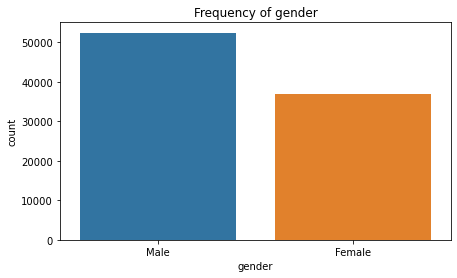

In [13]:
fig = plt.figure(figsize=(7,4))
sns.countplot(x='gender',data = train)
plt.title('Frequency of gender')
plt.show()

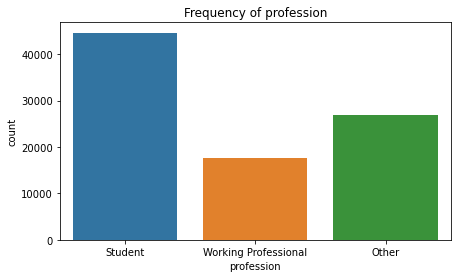

In [14]:
fig = plt.figure(figsize=(7,4))
sns.countplot(x='profession',data = train)
plt.title('Frequency of profession')
plt.show()

### Multivariate analysis

In [15]:
train = train.iloc[:,1:]
train = pd.get_dummies(data=train, columns=['gender','profession'])
train.shape

(89197, 12)

In [16]:
train.columns

Index(['user_id', 'category_id', 'video_id', 'age', 'followers', 'views',
       'engagement_score', 'gender_Female', 'gender_Male', 'profession_Other',
       'profession_Student', 'profession_Working Professional'],
      dtype='object')

In [17]:
train2 = train[['user_id', 'category_id', 'video_id', 'age', 'followers', 'views',
        'gender_Female', 'gender_Male', 'profession_Other',
       'profession_Student', 'profession_Working Professional','engagement_score']]

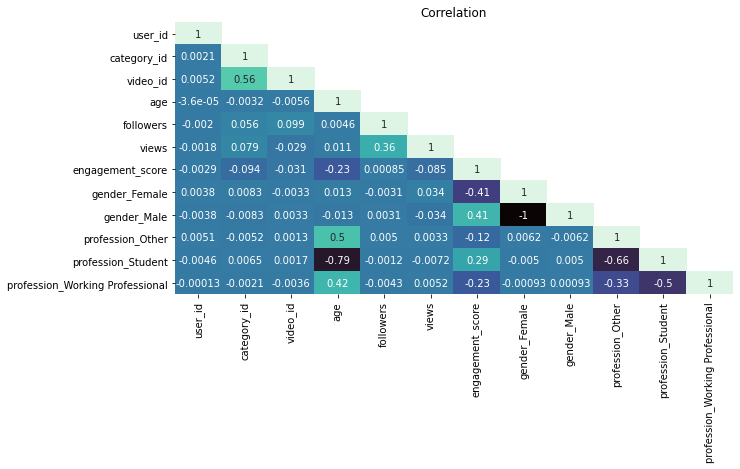

In [18]:
fig = plt.figure(figsize=(10,5))
sns.heatmap(data = train.corr(),annot=True,mask=np.triu(train.corr(), k=1),cbar=False,cmap='mako')
plt.title('Correlation')
plt.show()

In [19]:
def cal_vif(x):
    #calculating VIF
    vif=pd.DataFrame()
    vif["Variable"]=x.columns
    vif["vif"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    
    return(vif)

In [20]:
cal_vif(train2.iloc[:,:-1])

C:\Users\PawanK.DESKTOP-6J7APG0.000\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Variable,vif
0,user_id,1.000113
1,category_id,1.471325
2,video_id,1.482423
3,age,2.675225
4,followers,1.168328
5,views,1.174796
6,gender_Female,inf
7,gender_Male,inf
8,profession_Other,inf
9,profession_Student,inf


## Data cleaning and preprocessing

In [21]:
train2.head(2)

,user_id,category_id,video_id,age,followers,views,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional,engagement_score
0,19990,37,128,24,180,1000,0,1,0,1,0,4.33
1,5304,32,132,14,330,714,1,0,0,1,0,1.79


In [22]:
train2.columns

Index(['user_id', 'category_id', 'video_id', 'age', 'followers', 'views',
       'gender_Female', 'gender_Male', 'profession_Other',
       'profession_Student', 'profession_Working Professional',
       'engagement_score'],
      dtype='object')

In [23]:
train2 = train[['user_id', 'category_id', 'video_id', 'age', 'views','followers' ,'gender_Male', 'profession_Student',
       'profession_Working Professional','engagement_score']]

In [24]:
train2.head(2)

,user_id,category_id,video_id,age,views,followers,gender_Male,profession_Student,profession_Working Professional,engagement_score
0,19990,37,128,24,1000,180,1,1,0,4.33
1,5304,32,132,14,714,330,0,1,0,1.79


### Clustering

In [25]:
#Creating clusters of users to group user by age,gender and profession 

In [26]:
clusterdata = train[['age', 'gender_Female', 'gender_Male', 'profession_Other',
       'profession_Student', 'profession_Working Professional']]

In [27]:
clusterdata.head(2)

,age,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional
0,24,0,1,0,1,0
1,14,1,0,0,1,0


In [28]:
scaler_c = StandardScaler()
scaler_c = scaler_c.fit(clusterdata)
scaled_clusterdata = scaler_c.transform(clusterdata)


In [29]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i , random_state=20)
    kmeans.fit(clusterdata)
    wcss.append(kmeans.inertia_)



C:\Users\PawanK.DESKTOP-6J7APG0.000\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

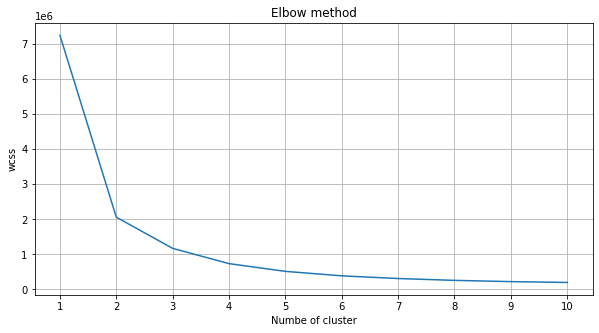

In [30]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Numbe of cluster')
plt.ylabel('wcss')
plt.xticks(range(1,11))
plt.grid(True)
plt.show

In [31]:
kmeans = KMeans(n_clusters= 3 , random_state=20)
model = kmeans.fit(clusterdata)

In [32]:
labels = model.predict(clusterdata)

In [33]:
train_c = train[['user_id', 'category_id', 'video_id','views','followers','engagement_score']]

In [34]:
train['user_group'] = labels

In [35]:
train2 = train[['user_id', 'category_id', 'age', 'followers', 'views',
       'gender_Female', 'gender_Male', 'profession_Other',
       'profession_Student', 'profession_Working Professional','user_group','engagement_score']]

In [36]:
bins= [0,13,18,25,35,45,70]
labels = ['4-13','10-18','18-25','25-35','35-45','45-70']
train2['AgeGroup'] = pd.cut(train2['age'], bins=bins, labels=labels, right=False)

In [37]:
train3 = train2.copy()

In [38]:
train3.head()

,user_id,category_id,age,followers,views,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional,user_group,engagement_score,AgeGroup
0,19990,37,24,180,1000,0,1,0,1,0,0,4.33,18-25
1,5304,32,14,330,714,1,0,0,1,0,1,1.79,10-18
2,1840,12,19,180,138,0,1,0,1,0,1,4.35,18-25
3,12597,23,19,220,613,0,1,0,1,0,1,3.77,18-25
4,13626,23,27,220,613,0,1,0,0,1,0,3.13,25-35


In [39]:
train3 = pd.get_dummies(data=train3, columns=['AgeGroup'])
train3.shape

(89197, 18)

In [40]:
train3.columns

Index(['user_id', 'category_id', 'age', 'followers', 'views', 'gender_Female',
       'gender_Male', 'profession_Other', 'profession_Student',
       'profession_Working Professional', 'user_group', 'engagement_score',
       'AgeGroup_4-13', 'AgeGroup_10-18', 'AgeGroup_18-25', 'AgeGroup_25-35',
       'AgeGroup_35-45', 'AgeGroup_45-70'],
      dtype='object')

In [41]:
train3 = train3[['user_id', 'category_id', 'followers', 'views', 'age','gender_Female',
       'gender_Male', 'profession_Other', 'profession_Student',
       'profession_Working Professional', 'user_group', 
       'AgeGroup_4-13', 'AgeGroup_10-18', 'AgeGroup_18-25', 'AgeGroup_25-35',
       'AgeGroup_35-45', 'AgeGroup_45-70','engagement_score']]

### Train test Split

In [42]:
y= train3.iloc[:,-1:]
x = train3.iloc[:,:-1]

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13)

In [44]:
scaler = StandardScaler()
scaler = scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
    

## Model Building

In [76]:
regressor = RandomForestRegressor(n_estimators=300,random_state=13)
regressor.fit(x_train,y_train.values.ravel())


RandomForestRegressor(n_estimators=150, random_state=13)

In [77]:
y_pred = regressor.predict(x_test)

In [78]:
y_pred

array([3.54846111, 3.97628889, 4.0971593 , ..., 4.40258556, 3.94137667,
       3.66056238])

In [79]:
r2_score(y_test,y_pred)

0.41918721236920276

In [49]:
x = train3.iloc[:,:-1]

In [50]:
#Fitting the model on entier data

In [51]:
scaler = StandardScaler()
scaler = scaler.fit(x)
x = scaler.transform(x)
    

In [52]:
regressor.fit(x,y.values.ravel())

RandomForestRegressor()

In [53]:
#model 2

## Final Submission

In [54]:
### Function to preprocess data

In [55]:
def process(data):
    def data_preprocessing(data):
        data = data.iloc[:,1:]
        data = pd.get_dummies(data=data, columns=['gender','profession'])
        data = data[['user_id', 'category_id', 'age', 'followers', 'views',
       'gender_Female', 'gender_Male', 'profession_Other',
       'profession_Student', 'profession_Working Professional']]



        return data
    data2 = data_preprocessing(data)
    def clustering(data2):

        clusterdata = data2[['age', 'gender_Female', 'gender_Male', 'profession_Other',
           'profession_Student', 'profession_Working Professional']]

        scaler_c = StandardScaler()
        scaler_c = scaler_c.fit(clusterdata)
        scaled_clusterdata = scaler_c.transform(clusterdata)
        kmeans = KMeans(n_clusters= 2 , random_state=20)
        model = kmeans.fit(clusterdata)

        labels = model.predict(clusterdata)
        
        data2['user_group'] = labels
        
        
        return data2
    
    return clustering(data2)

testing = process(test_data)

In [56]:
testing.head()

,user_id,category_id,age,followers,views,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional,user_group
0,7986,12,14,180,138,0,1,0,1,0,1
1,11278,34,14,230,840,0,1,0,1,0,1
2,17245,8,44,280,628,1,0,0,0,1,0
3,9851,16,18,270,462,0,1,0,1,0,1
4,16008,34,47,230,840,1,0,1,0,0,0


In [57]:
## Creeting age bins to creat age groups

In [58]:
bins= [0,13,18,25,35,45,70]
labels = ['4-13','10-18','18-25','25-35','35-45','45-70']
testing['AgeGroup'] = pd.cut(testing['age'], bins=bins, labels=labels, right=False)

In [59]:
testing = pd.get_dummies(data=testing, columns=['AgeGroup'])
train3.shape

(89197, 18)

In [60]:
testing = testing[['user_id', 'category_id', 'followers', 'views', 'age','gender_Female',
       'gender_Male', 'profession_Other', 'profession_Student',
       'profession_Working Professional', 'user_group', 
       'AgeGroup_4-13', 'AgeGroup_10-18', 'AgeGroup_18-25', 'AgeGroup_25-35',
       'AgeGroup_35-45', 'AgeGroup_45-70']]

In [61]:
testing.head()

,user_id,category_id,followers,views,age,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional,user_group,AgeGroup_4-13,AgeGroup_10-18,AgeGroup_18-25,AgeGroup_25-35,AgeGroup_35-45,AgeGroup_45-70
0,7986,12,180,138,14,0,1,0,1,0,1,0,1,0,0,0,0
1,11278,34,230,840,14,0,1,0,1,0,1,0,1,0,0,0,0
2,17245,8,280,628,44,1,0,0,0,1,0,0,0,0,0,1,0
3,9851,16,270,462,18,0,1,0,1,0,1,0,0,1,0,0,0
4,16008,34,230,840,47,1,0,1,0,0,0,0,0,0,0,0,1


In [62]:
scaled_test = scaler.transform(testing)


In [63]:
y_pred = regressor.predict(scaled_test)

In [64]:
y_pred

array([4.16528667, 3.92708167, 2.43586738, ..., 2.84577119, 3.67447167,
       2.92144298])

In [65]:
submission = test_data[['row_id']]

In [66]:
submission['engagement_score'] = y_pred

<ipython-input-66-77e872b671ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['engagement_score'] = y_pred


In [67]:
submission = pd.DataFrame(submission)

In [68]:
submission

,row_id,engagement_score
0,89198,4.165287
1,89199,3.927082
2,89200,2.435867
3,89201,2.982765
4,89202,1.957203
...,...,...
11116,100314,3.866457
11117,100315,3.479235
11118,100316,2.845771
11119,100317,3.674472


In [69]:
submission.to_csv('submission.csv',index=False)